Training to predict whether the patient having diabetes or not (predicting the "status" column value: 0 (not having diabetes) or 1 (having prediabetes or diabetes))

In [92]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('data_train.csv')

# Check for duplicates before removing the "Id" column
print(data.duplicated().sum())

# Remove the "Id" column
data = data.drop('Id', axis=1)
print(data.shape)

0
(202944, 24)


In [646]:
data.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'ExtraMedTest', 'ExtraAlcoholTest', 'Status'],
      dtype='object')

In [232]:
print(data.info())

print(data.shape)

#count missing values
missing_values = data.isnull().sum()
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HighBP                202944 non-null  category
 1   HighChol              202944 non-null  category
 2   CholCheck             202944 non-null  category
 3   BMI                   202944 non-null  int64   
 4   Smoker                202944 non-null  category
 5   Stroke                202944 non-null  category
 6   HeartDiseaseorAttack  202944 non-null  category
 7   PhysActivity          202944 non-null  category
 8   Fruits                202944 non-null  category
 9   Veggies               202944 non-null  category
 10  HvyAlcoholConsump     202944 non-null  category
 11  AnyHealthcare         202944 non-null  category
 12  NoDocbcCost           202944 non-null  category
 13  GenHlth               202944 non-null  category
 14  MentHlth              202944 non-nul

In [233]:
print(data.describe())

                 BMI       MentHlth       PhysHlth            Age  \
count  202944.000000  202944.000000  202944.000000  202944.000000   
mean       28.379824       3.196971       4.256455       8.037449   
std         6.612738       7.427247       8.736665       3.051568   
min        12.000000       0.000000       0.000000       1.000000   
25%        24.000000       0.000000       0.000000       6.000000   
50%        27.000000       0.000000       0.000000       8.000000   
75%        31.000000       2.000000       3.000000      10.000000   
max        98.000000      30.000000      30.000000      13.000000   

        ExtraMedTest  ExtraAlcoholTest  
count  202944.000000     202944.000000  
mean       -7.408660         -7.560041  
std        75.993743         75.927137  
min      -199.000000       -199.000000  
25%       -55.000000        -55.000000  
50%         0.000000          0.000000  
75%        40.000000         40.000000  
max       199.000000        199.000000  


In [234]:
from matplotlib import pyplot as plt
from collections import Counter
# summarize class distribution
counter = Counter(data['Status'])
print(counter)

#show the ratio of the classes
ratio = counter[0]/counter[1]
ratio

Counter({0: 167313, 1: 35631})


4.69571440599478

A ratio around ~1:4.695 class distribution

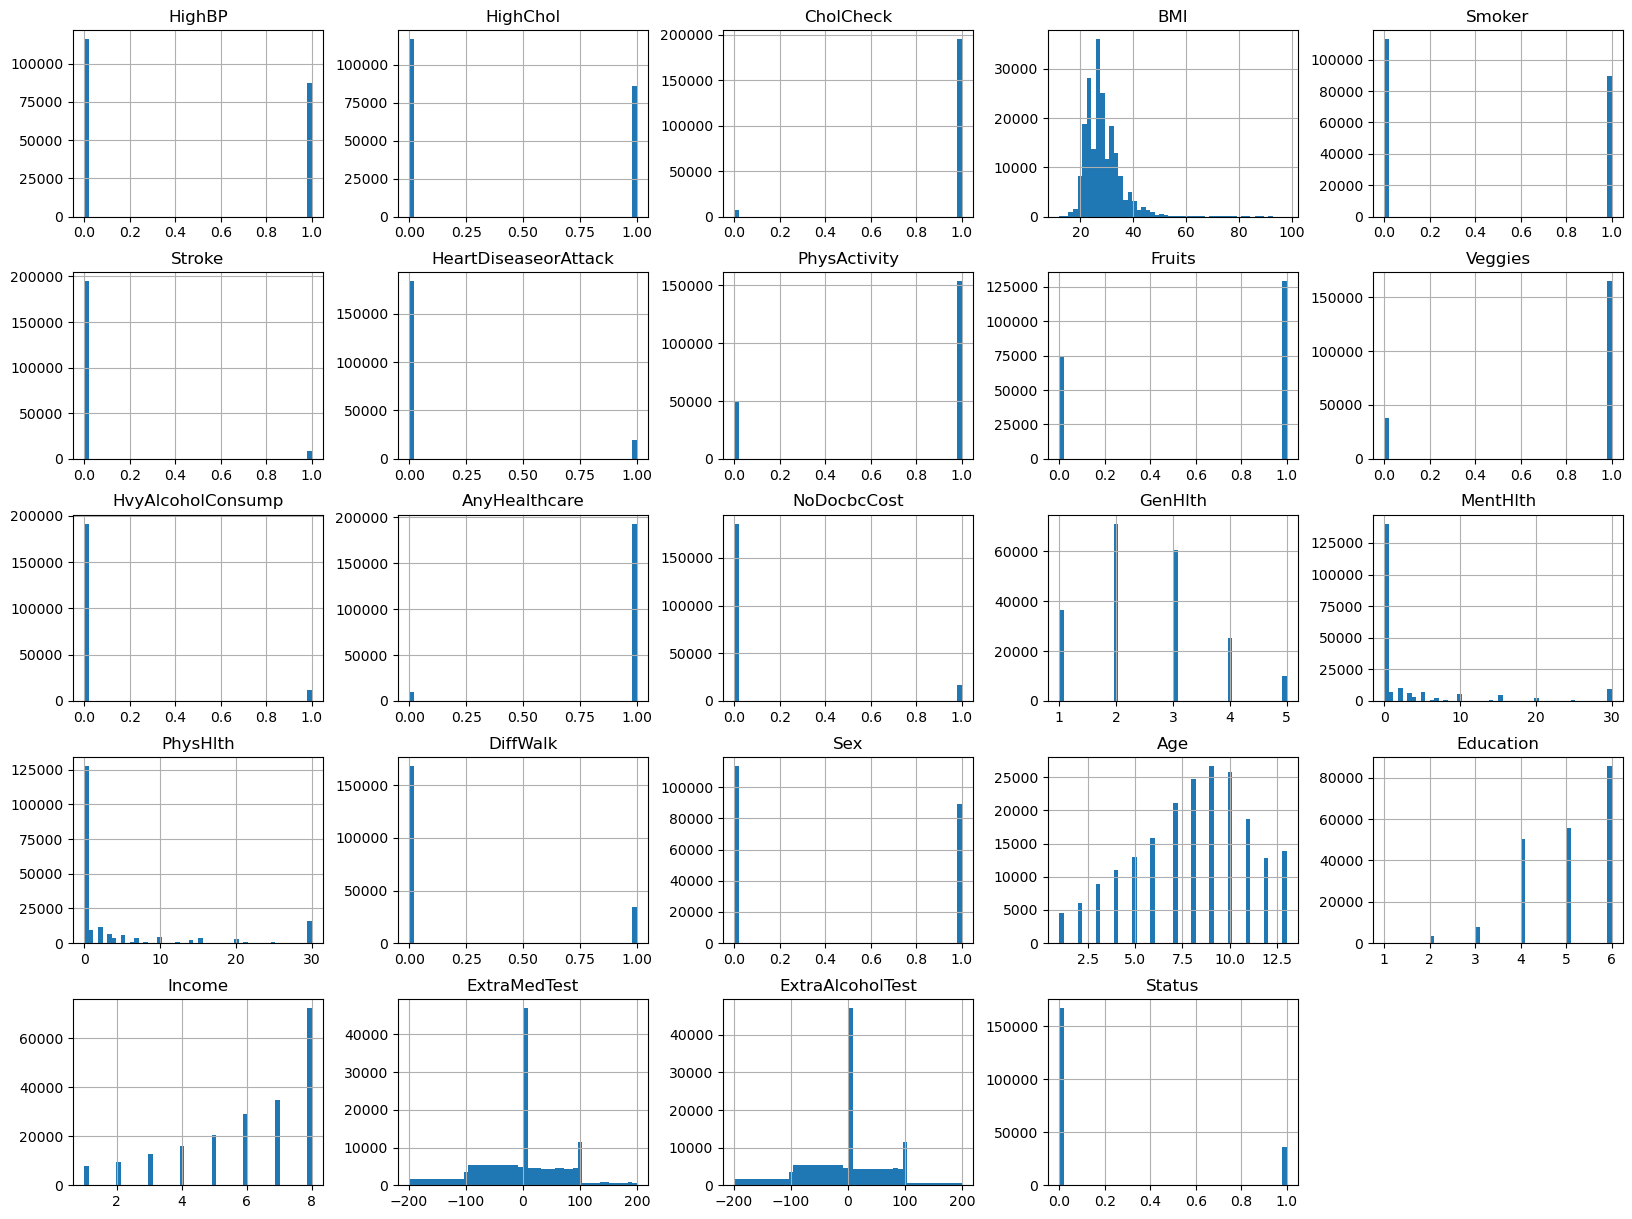

In [651]:
# Draw a histogram for the all columns
data.hist(bins=50, figsize=(20, 15))
plt.show()

- Very imbalanced dataset, in Status, the majority of the patient in the dataset don't have diabetes, whereas only a small percentage have it
- BMI is heavily skewed to the left, influenced by extremely high outliners 
- Data errors in ExtraMedTest and ExtraAlcoholTest as they are supposed only to be in range of -100 to 100. However the min is -199 and the max is 199 in both fields.
- Various life style choices are also need to keep in mind because of imbalanced distribution (cholCheck, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk)
- MentHlth,PhysHlth having similar distribution both heavily skewed to the left with similar properties. Same with Income, Education but to the right



In [652]:
ErrorMedTest = pd.concat([data[(data['ExtraMedTest'] < -100)], data[(data['ExtraMedTest'] >100)]])
ErrorAlcoholTest =  pd.concat([data[(data['ExtraAlcoholTest'] < -100)], data[(data['ExtraAlcoholTest'] >100)]])

print(ErrorMedTest.describe())
print(ErrorAlcoholTest.describe())

             HighBP      HighChol     CholCheck           BMI        Smoker  \
count  29515.000000  29515.000000  29515.000000  29515.000000  29515.000000   
mean       0.462680      0.449094      0.965340     28.775165      0.450313   
std        0.498614      0.497410      0.182921      6.770360      0.497534   
min        0.000000      0.000000      0.000000     12.000000      0.000000   
25%        0.000000      0.000000      1.000000     24.000000      0.000000   
50%        0.000000      0.000000      1.000000     27.000000      0.000000   
75%        1.000000      1.000000      1.000000     32.000000      1.000000   
max        1.000000      1.000000      1.000000     98.000000      1.000000   

             Stroke  HeartDiseaseorAttack  PhysActivity        Fruits  \
count  29515.000000          29515.000000  29515.000000  29515.000000   
mean       0.044486              0.107437      0.743080      0.625377   
std        0.206175              0.309673      0.436942      0.484034

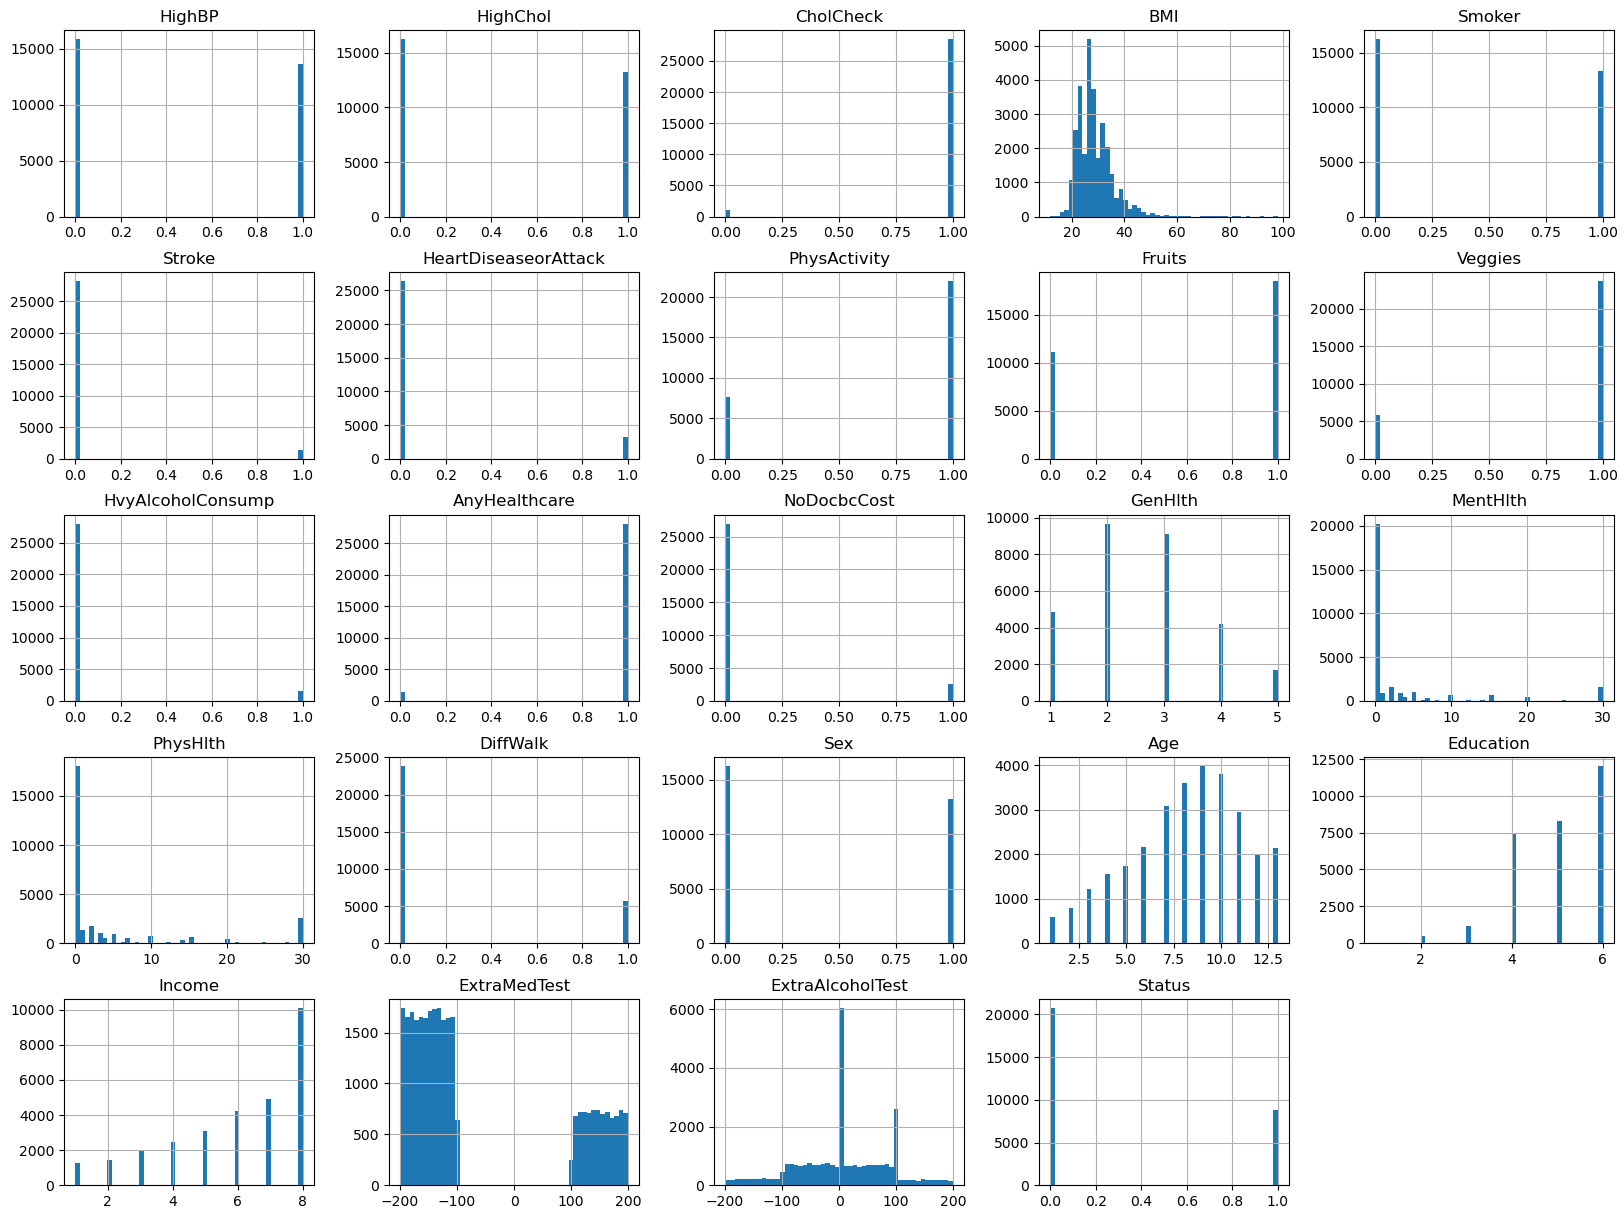

In [653]:
ErrorMedTest.hist(bins=50, figsize=(20, 15))
plt.show()

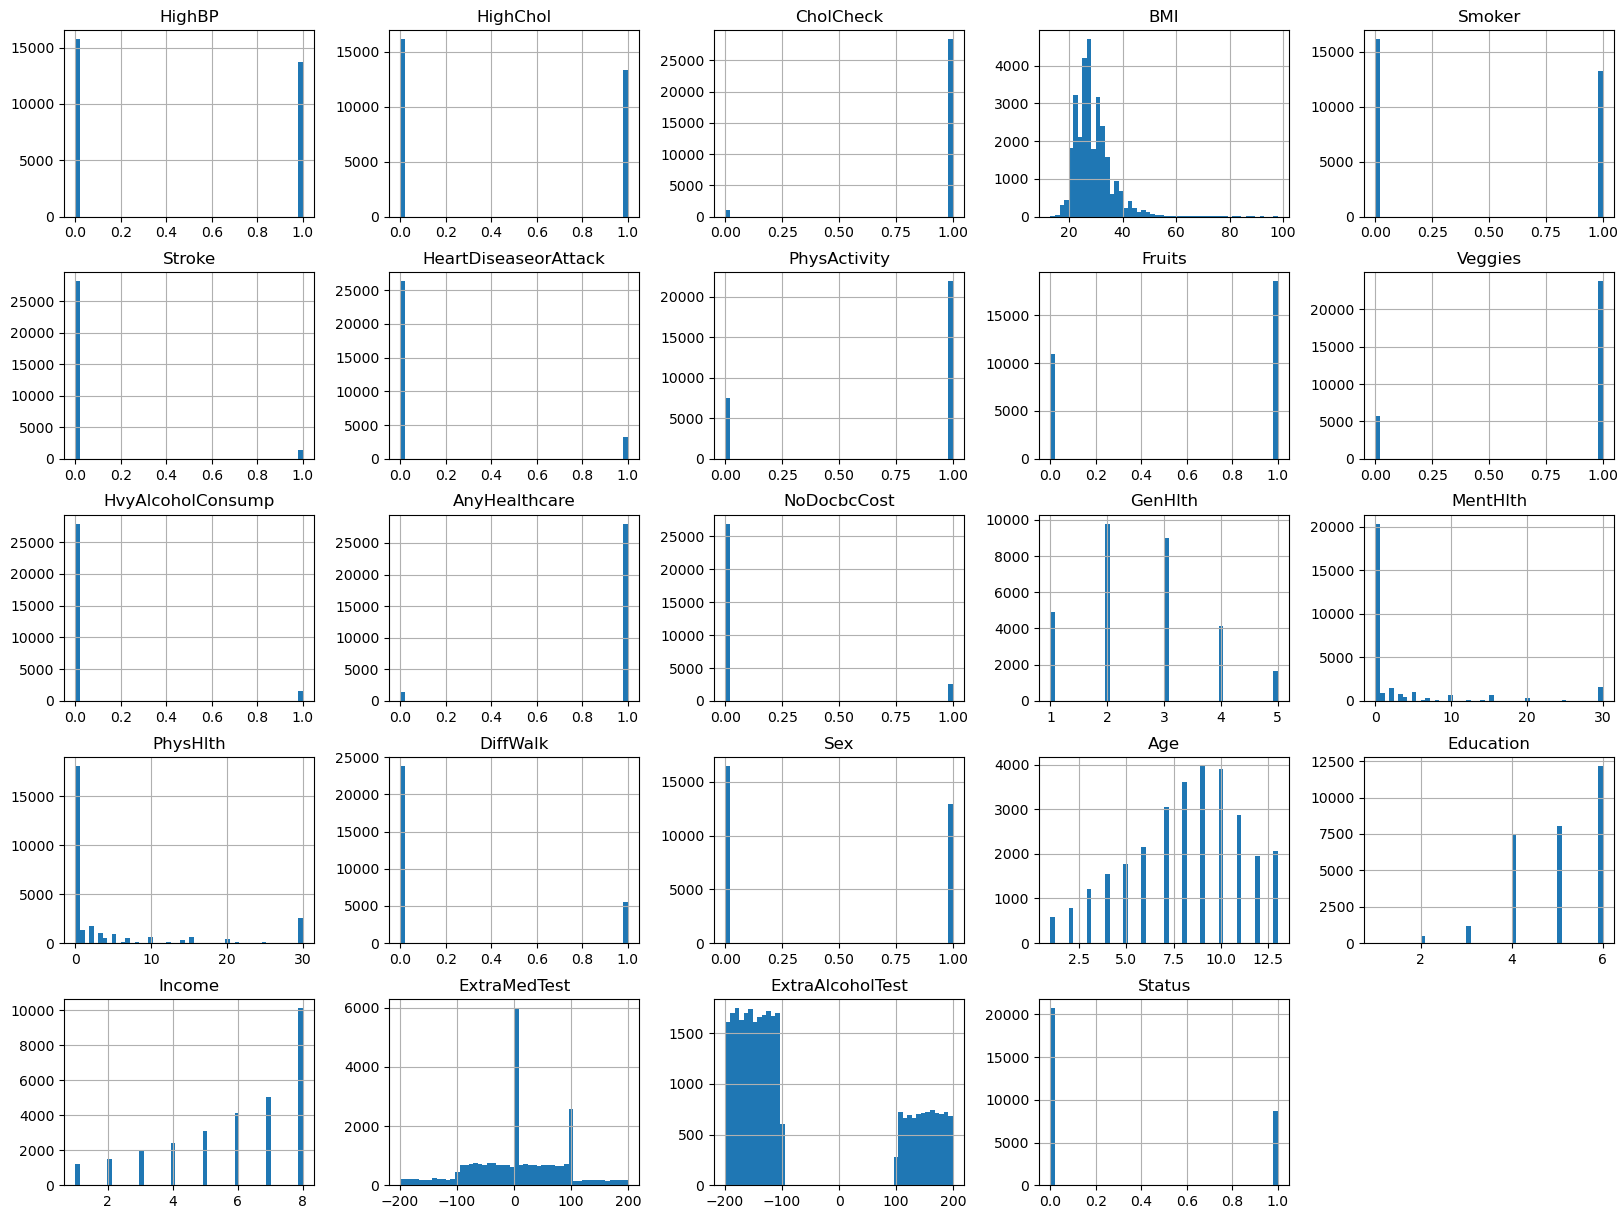

In [654]:
ErrorAlcoholTest.hist(bins=50, figsize=(20, 15))
plt.show()

We can see from the 3 histogram plots that in both off all the error data entries in the ExtraMedTest, ExtraAlcoholTest, beside the error data from the column's itself
(ExtraMedTest still contain valid data entries in ExtraAlcholTest, and vice versa).
The distribution in all of the rest of the columns still behave similarly to the full dataset. This suggest that the rest of the data for the 2 two columns are valid, hence I would like to use the mean imputation, converting the invalid values into the mean values of these two columns.

However, there is one more data error I want to check is the bmi value above 50, larger than the 99th percentile of the feature. See if high bmi have any connection with the extra test error

In [655]:
ErrorBMI = pd.concat([data[(data['BMI'] > 50)]])
print(ErrorBMI.describe())


            HighBP     HighChol    CholCheck          BMI       Smoker  \
count  1747.000000  1747.000000  1747.000000  1747.000000  1747.000000   
mean      0.613051     0.451631     0.970807    62.242702     0.405839   
std       0.487191     0.497797     0.168395    12.205267     0.491194   
min       0.000000     0.000000     0.000000    51.000000     0.000000   
25%       0.000000     0.000000     1.000000    53.000000     0.000000   
50%       1.000000     0.000000     1.000000    57.000000     0.000000   
75%       1.000000     1.000000     1.000000    71.000000     1.000000   
max       1.000000     1.000000     1.000000    98.000000     1.000000   

            Stroke  HeartDiseaseorAttack  PhysActivity       Fruits  \
count  1747.000000           1747.000000   1747.000000  1747.000000   
mean      0.049227              0.118489      0.522038     0.526617   
std       0.216404              0.323279      0.499657     0.499434   
min       0.000000              0.000000      0.0

array([[<Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>],
       [<Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>,
        <Axes: title={'center': 'Veggies'}>],
       [<Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>,
        <Axes: title={'center': 'MentHlth'}>],
       [<Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center'

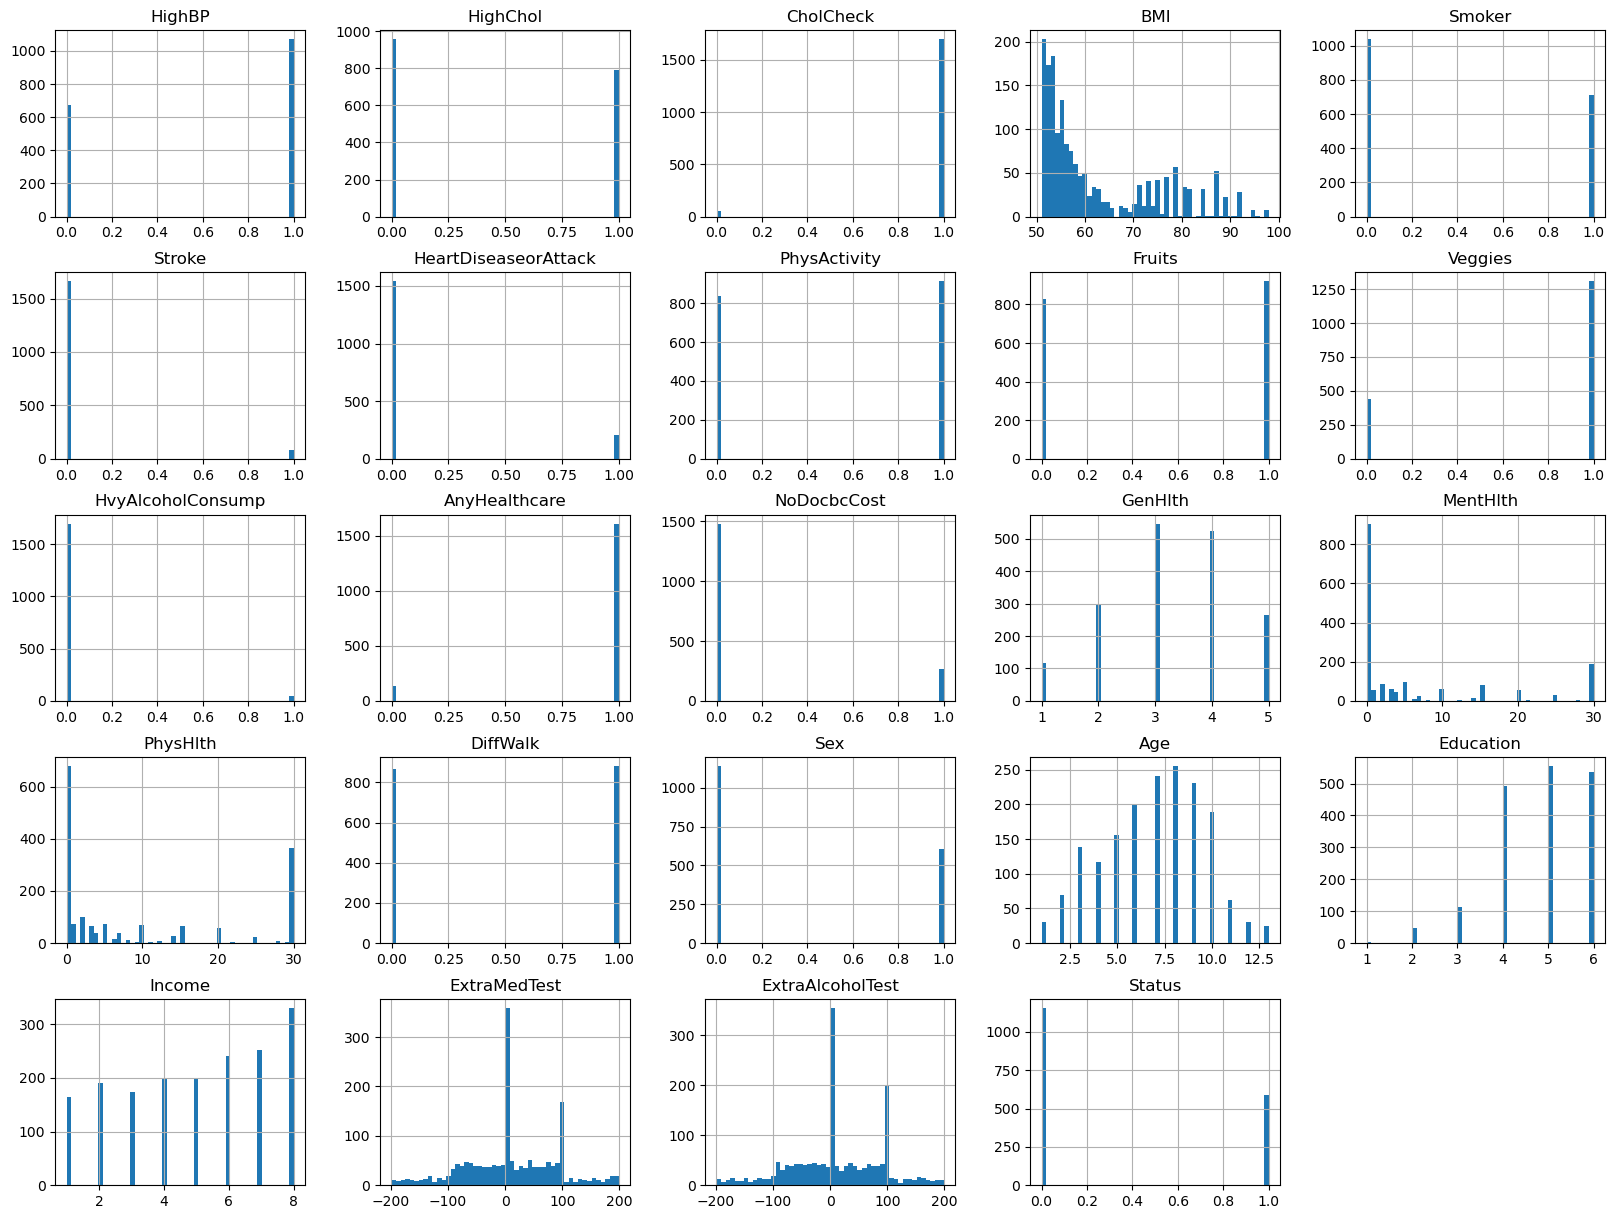

In [656]:
ErrorBMI.hist(bins=50, figsize=(20, 15))

Hmm, interesting. Despite having high bmi, the distribution of the rest of the features remain the same as the full dataset. For peopl with BMI, you would expect that they would higher HighChol and the ratio between 0 and 1 in HighChol would not remain the same. Other lifestyle choices like alchohol consumption, veggies or number of stroke, heart disease attack remain the same. However, there are some features that righfully reflect the high BMI like difficult walking, fruits, physical activity

        HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
872          0         0          1   51       1       0   
56994        0         0          1   51       0       0   
57841        1         0          1   51       0       0   
60234        0         0          1   51       0       0   
61065        0         0          1   51       1       0   
...        ...       ...        ...  ...     ...     ...   
188139       0         0          1   92       0       0   
7733         0         0          1   95       1       0   
112749       1         0          1   95       0       0   
16326        1         0          1   96       0       0   
69872        0         0          1   98       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  MentHlth  \
872                        0             1       1        1  ...        18   
56994                      0             0       0        1  ...         0   
57841                      0             0   

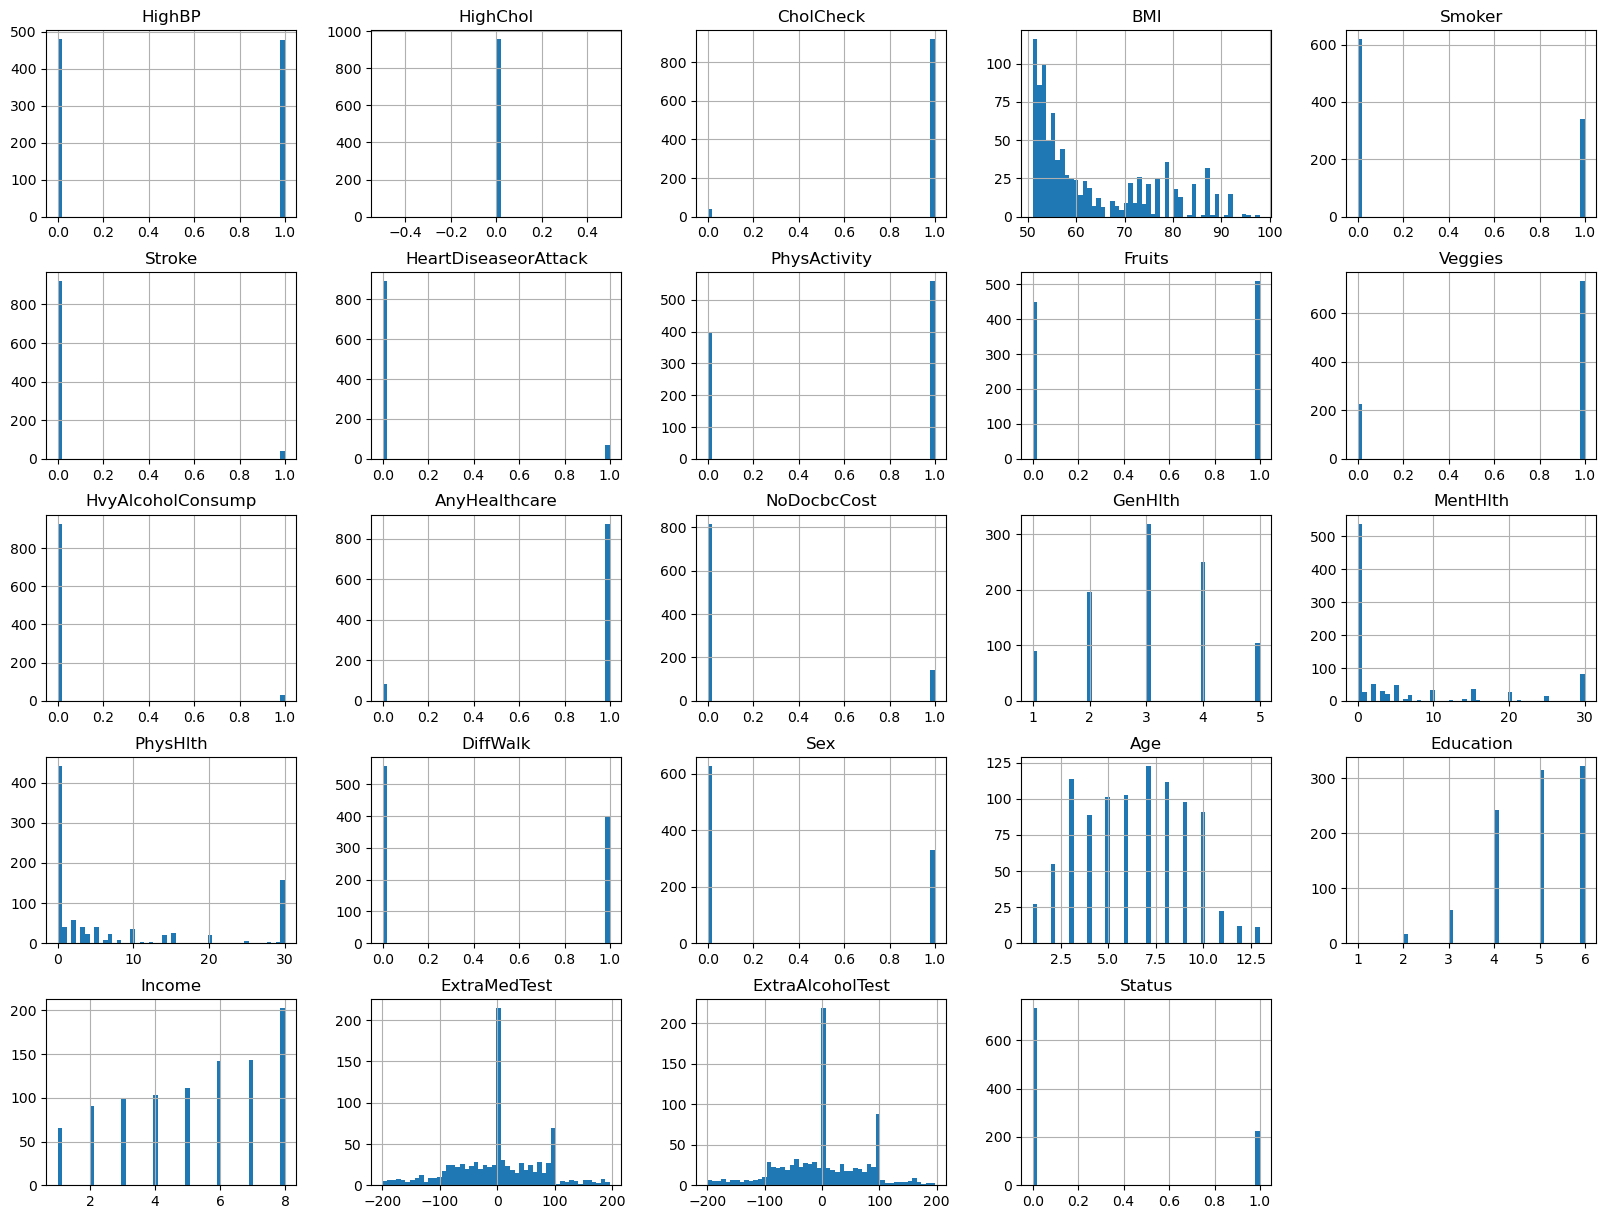

In [657]:
error_df = ErrorBMI[ErrorBMI['HighChol']==0]
print(error_df.sort_values(by='BMI', ascending=True))

error_df.hist(bins=50, figsize=(20, 15))
plt.show()



        HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
872          0         0          1   51       1       0   
97334        0         0          1   51       0       0   
93340        0         0          1   51       1       0   
36915        0         0          1   51       0       0   
18238        0         0          1   51       0       0   
...        ...       ...        ...  ...     ...     ...   
188139       0         0          1   92       0       0   
27002        0         0          1   92       1       0   
121257       0         0          1   92       0       0   
7733         0         0          1   95       1       0   
69872        0         0          1   98       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  MentHlth  \
872                        0             1       1        1  ...        18   
97334                      0             1       1        0  ...         0   
93340                      1             1   

array([[<Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>],
       [<Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>,
        <Axes: title={'center': 'Veggies'}>],
       [<Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>,
        <Axes: title={'center': 'MentHlth'}>],
       [<Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center'

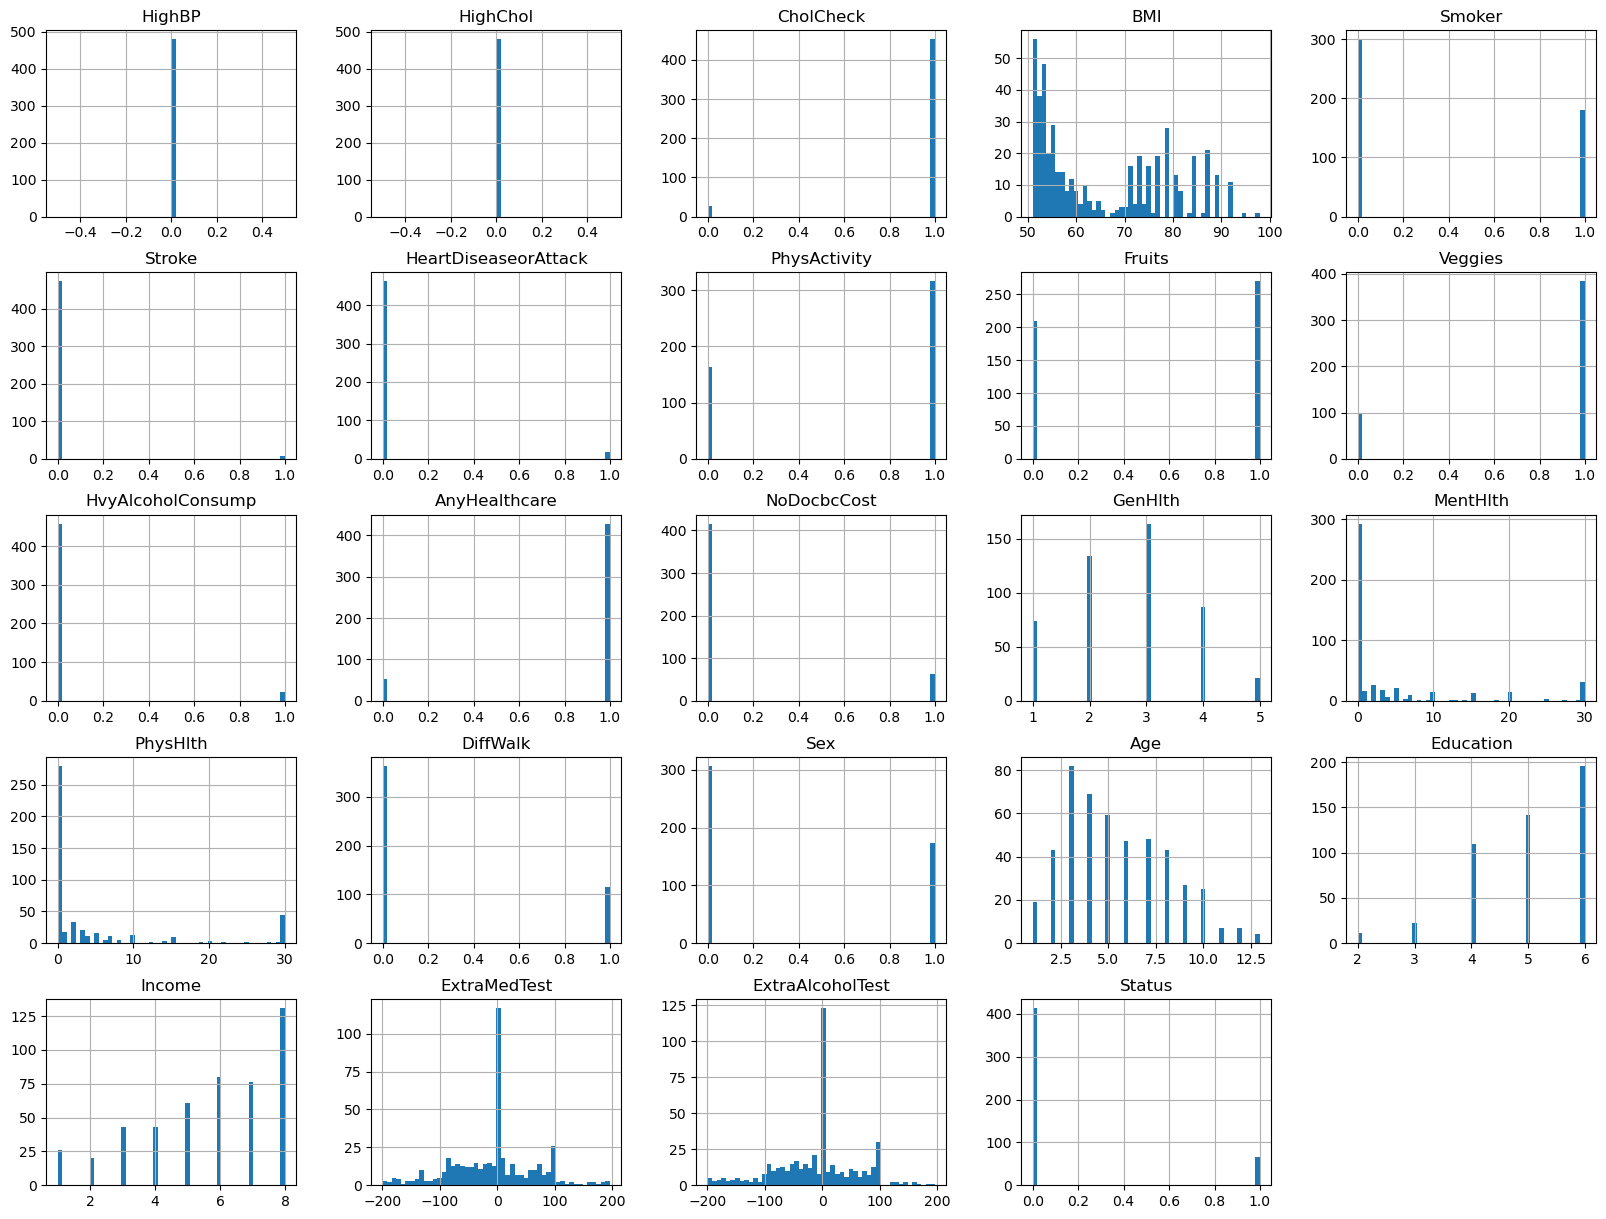

In [658]:
error_df_ = error_df[error_df['HighBP']==0]
print(error_df_.sort_values(by='BMI', ascending=True))

error_df_.hist(bins=50, figsize=(20, 15))

Based on the 3 plots, I was going to delete all instances of error BMI that have highChol and highPB == 0. However, on second thought, this could introduce bias into the data as all the BMI outliers will have the values of highChol and highBP == 0. Since there are rare cases of people with high bmi having 0 of these conditions. Moreover, after I split the data into subdata, some of the features reflect the logical changes that one would expect in a highBMI person, most are not though. Hence I'm really unsure whether these outliers are valid or not

I'm just gonna do mean imputation for the 2 extra test features then copy the dataset and later try either capping the BMI outliers or also using mean imputation

Testing with different method and the yeo-johnson seems to handle the best

PREPROCESSING

In [91]:
data_clean = data.copy() #Keep a backup of the original data

In [177]:
data = data_clean.copy()

In [178]:
#Convert the categorical features to categorical dtype
for col in data:
    if data[col].nunique() < 10:
        data[col] = data[col].astype('category')

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HighBP                202944 non-null  category
 1   HighChol              202944 non-null  category
 2   CholCheck             202944 non-null  category
 3   BMI                   202944 non-null  int64   
 4   Smoker                202944 non-null  category
 5   Stroke                202944 non-null  category
 6   HeartDiseaseorAttack  202944 non-null  category
 7   PhysActivity          202944 non-null  category
 8   Fruits                202944 non-null  category
 9   Veggies               202944 non-null  category
 10  HvyAlcoholConsump     202944 non-null  category
 11  AnyHealthcare         202944 non-null  category
 12  NoDocbcCost           202944 non-null  category
 13  GenHlth               202944 non-null  category
 14  MentHlth              202944 non-nul

In [179]:
dataY = data['Status']
dataX = data.drop(columns='Status')

In [180]:
dataXExpand = pd.get_dummies(dataX, drop_first=False)
dataXExpand.head()


,BMI,MentHlth,PhysHlth,Age,ExtraMedTest,ExtraAlcoholTest,HighBP_0,HighBP_1,HighChol_0,HighChol_1,...,Education_5,Education_6,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,24,0,0,8,60,0,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,28,1,0,2,0,-64,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
2,36,30,30,3,-46,0,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,35,0,0,8,-83,-188,True,False,False,True,...,False,True,False,False,False,False,False,False,False,True
4,27,0,0,9,-58,0,True,False,False,True,...,True,False,False,False,False,True,False,False,False,False


In [120]:
dataXExpand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 53 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   BMI                     202944 non-null  int64
 1   MentHlth                202944 non-null  int64
 2   PhysHlth                202944 non-null  int64
 3   Age                     202944 non-null  int64
 4   ExtraMedTest            202944 non-null  int64
 5   ExtraAlcoholTest        202944 non-null  int64
 6   HighBP_0                202944 non-null  bool 
 7   HighBP_1                202944 non-null  bool 
 8   HighChol_0              202944 non-null  bool 
 9   HighChol_1              202944 non-null  bool 
 10  CholCheck_0             202944 non-null  bool 
 11  CholCheck_1             202944 non-null  bool 
 12  Smoker_0                202944 non-null  bool 
 13  Smoker_1                202944 non-null  bool 
 14  Stroke_0                202944 non-null  bool 
 15  

In [181]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(dataY)
class_labels = le.inverse_transform([0,1])
dataY = le.transform(dataY)

In [182]:
print(dataY)
print(len(dataY))
print(class_labels)

[0 0 0 ... 0 0 0]
202944
[0 1]


In [183]:
from sklearn.model_selection import train_test_split

#with pd.option_context('mode.chained_assignment', None):
train_data_X_, test_data_X, train_data_y_ , test_data_y = train_test_split(dataXExpand, dataY, test_size=0.2, 
                                              shuffle=True,random_state=0)
    
#with pd.option_context('mode.chained_assignment', None):
train_data_X, val_data_X, train_data_y, val_data_y = train_test_split(train_data_X_, train_data_y_, test_size=0.25, 
                                            shuffle=True,random_state=0)
    
print(train_data_X.shape, val_data_X.shape, test_data_X.shape)

(121766, 53) (40589, 53) (40589, 53)


In [223]:
#Standardize the data
x_train = train_data_X
y_train = train_data_y

x_test = test_data_X
y_test = test_data_y

x_val = val_data_X
y_val = val_data_y

In [260]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler  



class CustomMeanImputer(BaseEstimator, TransformerMixin):
    def __init__(self, ranges):
        self.ranges = ranges

    def fit(self, X, y=None):
        self.means_ = {}
        for col, (low, high) in self.ranges.items():
            valid_data = X[col].loc[(X[col] >= low) & (X[col] <= high)]
            self.means_[col] = int(valid_data.mean().round())
            # print(self.means_[col])
        return self

    def transform(self, X):
        for col, (low, high) in self.ranges.items():
            X.loc[(X[col] < low) | (X[col] > high), col] = self.means_[col]
        return X


mean_imputer = CustomMeanImputer(ranges={
                'ExtraMedTest': (-100, 100), 
                'ExtraAlcoholTest': (-100, 100), 
                'BMI': (10, 50),    
            })
scaler = StandardScaler()

error_index_list = [x_train.columns.get_loc(col) for col in ['ExtraMedTest', 'ExtraAlcoholTest', 'BMI']]


numerical_ix = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = x_train.select_dtypes(include=['object', 'bool']).columns


smote = SMOTE()


# define the data preparation for the columns
t = [('impute', mean_imputer, error_index_list),
     ('num', PowerTransformer(method='yeo-johnson'), numerical_ix),
     ('scaler', scaler, numerical_ix)]
col_transform = ColumnTransformer(transformers=t)


In [225]:
#Smote
x_train, y_train = smote.fit_resample(x_train, y_train)

In [226]:
print(x_train.shape, y_train.shape)

(200948, 53) (200948,)


In [208]:
from sklearn.linear_model import LogisticRegression
logReg_model = LogisticRegression(max_iter=1000)

pipeline = Pipeline(steps=[('prep', col_transform), ('model', logReg_model)])

In [209]:
from sklearn.metrics import fbeta_score, make_scorer

f2_scorer = make_scorer(fbeta_score, beta=2)

In [210]:
from statistics import mean
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x_train, y_train, scoring=f2_scorer, cv=cv, n_jobs=-1)

print('Mean F2: %.3f' % mean(scores))

Mean F2: 0.738


In [227]:
#Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__max_iter': [1000, 2000, 3000, 4000, 5000],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'model__random_state': [1]
}

n_splits = 10
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=3, random_state=1)
grid_search = GridSearchCV(pipeline, param_grid, scoring=f2_scorer, cv=cv, n_jobs=-1)
grid_search.fit(x_train, y_train)

20
19
29


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('impute',
                                                                         CustomMeanImputer(ranges={'BMI': (10,
                                                                                                           50),
                                                                                                   'ExtraAlcoholTest': (-100,
                                                                                                                        100),
                                                                                                   'ExtraMedTest': (-100,
                                                                                                                    100)}),
                                                                         [4, 5,
                                                                          0]),
                                                                        ('num',
                                                                         PowerTransformer(),
                                                                         Index(['BMI', 'MentHlth', 'PhysHlth', 'Age', 'ExtraMedTest',
       'Extr...
                                                                         Index(['BMI', 'MentHlth', 'PhysHlth', 'Age', 'ExtraMedTest',
       'ExtraAlcoholTest'],
      dtype='object'))])),
                                       ('model',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'model__max_iter': [1000, 2000, 3000, 4000, 5000],
                         'model__random_state': [1],
                         'model__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                           'sag', 'saga']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [228]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'model__max_iter': 2000, 'model__random_state': 1, 'model__solver': 'sag'}
Best cross-validation score: 0.87


In [231]:
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score

tuned_log_model = grid_search.best_estimator_


train_pred = grid_search.predict(x_train)
val_pred = grid_search.predict(x_val)

train_acc = fbeta_score(y_train, train_pred, beta=2)
val_acc = fbeta_score(y_val, val_pred, beta=2)
print('Train F2: %.3f' % train_acc)
print('Validation F2: %.3f' % val_acc)


print(classification_report(y_val, val_pred))

Train F2: 0.873
Validation F2: 0.818
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     33345
           1       0.65      0.87      0.75      7244

    accuracy                           0.89     40589
   macro avg       0.81      0.89      0.84     40589
weighted avg       0.91      0.89      0.90     40589



Text(50.722222222222214, 0.5, 'Actual')

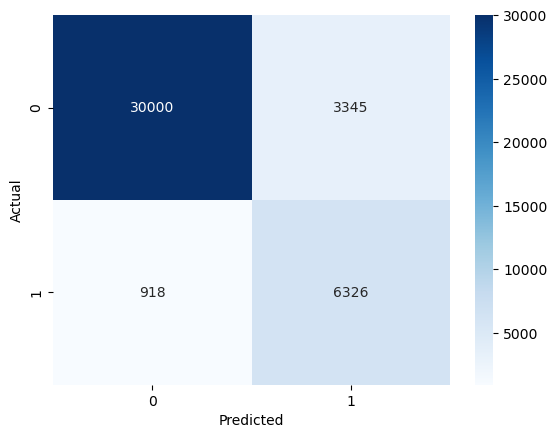

In [235]:
#Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_val, val_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')


Pretty expected result, since the logRegression was enginneer to have a high recall, however, in the way, sarcrificing precision and accuracy.
Moreover, the gap between train accoracy and validation accuracy is also quite concerning. Was hoping to reach at least 70% on the validation score. (First time)


With using pipeline, and proper data preprocessing to avoid bias in training the model, the log regression model achieve a much higher precicion along with high f2 score.

DECISION TREE WITH SMOTE

In [302]:
train_x = train_data_X
train_y = train_data_y

test_x = test_data_X
test_y = test_data_y

val_x = val_data_X
val_y = val_data_y

In [303]:
from sklearn.metrics import fbeta_score

def get_f2_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_f2 = fbeta_score(train_y, train_pred, beta=2, average='macro')
    val_f2 = fbeta_score(val_y, val_pred, beta=2, average='macro')
    
    return train_f2, val_f2


In [304]:
#SMOTE oversampling the minority class
smote = SMOTE(sampling_strategy=0.5)
train_x, train_y = smote.fit_resample(train_x, train_y)
print(train_x.shape)
print(train_y.shape)

(150711, 53)
(150711,)


In [305]:
from imblearn.under_sampling import RandomUnderSampler
#Under sampling the majority class
rus = RandomUnderSampler(sampling_strategy=0.8)
train_x, train_y = rus.fit_resample(train_x, train_y)

In [257]:
print(train_x.shape)
print(train_y.shape)

(113033, 53)
(113033,)


In [261]:
from sklearn import tree
tree_depth_list = [3, 5, 7, 9, 11, 13, 15, 17, 19, 35] 
train_acc_list = []
val_acc_list = []


for depth in tree_depth_list:
    dt_clf = tree.DecisionTreeClassifier(max_depth=depth)
    pipeline_dt = Pipeline(steps=[('prep', col_transform), ('model', dt_clf)])
    pipeline_dt.fit(train_x, train_y)
    
    train_f2, val_f2 = get_f2_scores(pipeline_dt, train_x, train_y, val_x, val_y)
    
    train_acc_list.append(train_f2)
    val_acc_list.append(val_f2) 
    

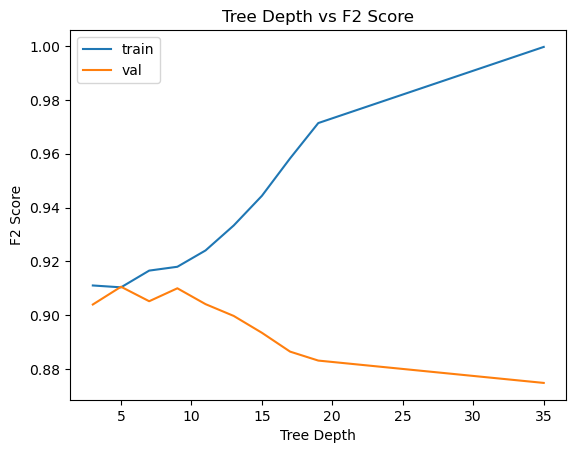

In [262]:
#plot the train and val accuracy
plt.plot(tree_depth_list, train_acc_list, label='train')
plt.plot(tree_depth_list, val_acc_list, label='val')
plt.legend()
plt.xlabel('Tree Depth')
plt.ylabel('F2 Score')
plt.title('Tree Depth vs F2 Score')
plt.show()

In [263]:
#Show the best tree depth
best_tree_depth = tree_depth_list[np.argmax(val_acc_list)]
print('Best Tree Depth:', best_tree_depth)


Best Tree Depth: 5


In [264]:
train_acc, val_acc = get_f2_scores(pipeline_dt, train_x, train_y, val_x, val_y)
print('Train F2:', train_acc)
print('Validation F2:', val_acc)

Train F2: 0.9997539524805263
Validation F2: 0.8747420684199225


Hmm, major overfitting (first time)

Still contain overfitting however the validation score is much higher, from 0.76 to 0.84

In [271]:
from sklearn.model_selection import GridSearchCV

f2_scorer = make_scorer(fbeta_score, beta=2, average='macro')

parameters = {'model__max_depth':np.arange(2,400, 50),
              'model__min_samples_split':np.arange(2,25,5)}

grid_search_dt = GridSearchCV(pipeline_dt, parameters, scoring=f2_scorer, cv=5)
grid_search_dt.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('impute',
                                                                         CustomMeanImputer(ranges={'BMI': (10,
                                                                                                           50),
                                                                                                   'ExtraAlcoholTest': (-100,
                                                                                                                        100),
                                                                                                   'ExtraMedTest': (-100,
                                                                                                                    100)}),
                                                                         [4, 5,
                                                                          0]),
                                                                        ('num',
                                                                         PowerTransformer(),
                                                                         Index(['BMI', 'MentHlth', 'PhysHlth', 'Age', 'ExtraMedTest',
       'ExtraAlcoholTest'],
      dtype='object')),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         Index(['BMI', 'MentHlth', 'PhysHlth', 'Age', 'ExtraMedTest',
       'ExtraAlcoholTest'],
      dtype='object'))])),
                                       ('model',
                                        DecisionTreeClassifier(max_depth=35))]),
             param_grid={'model__max_depth': array([  2,  52, 102, 152, 202, 252, 302, 352]),
                         'model__min_samples_split': array([ 2,  7, 12, 17, 22])},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2, average=macro))

In [272]:
pd.DataFrame(grid_search_dt.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.422632,0.017001,0.016945,0.001360,2,2,"{'model__max_depth': 2, 'model__min_samples_sp...",0.882064,0.879856,0.879809,0.880648,0.880532,0.880582,0.000816,36
1,0.414790,0.014673,0.015671,0.000706,2,7,"{'model__max_depth': 2, 'model__min_samples_sp...",0.882064,0.879856,0.879809,0.880648,0.880532,0.880582,0.000816,36
2,0.403058,0.008716,0.015675,0.001096,2,12,"{'model__max_depth': 2, 'model__min_samples_sp...",0.882064,0.879856,0.879809,0.880648,0.880532,0.880582,0.000816,36
3,0.396828,0.012617,0.015354,0.000373,2,17,"{'model__max_depth': 2, 'model__min_samples_sp...",0.882064,0.879856,0.879809,0.880648,0.880532,0.880582,0.000816,36
4,0.396380,0.014967,0.015140,0.000090,2,22,"{'model__max_depth': 2, 'model__min_samples_sp...",0.882064,0.879856,0.879809,0.880648,0.880532,0.880582,0.000816,36
5,0.644141,0.012515,0.016555,0.000965,52,2,"{'model__max_depth': 52, 'model__min_samples_s...",0.910876,0.909920,0.919172,0.923700,0.921316,0.916997,0.005583,6
6,0.651077,0.011683,0.016551,0.000423,52,7,"{'model__max_depth': 52, 'model__min_samples_s...",0.910519,0.907366,0.917289,0.921758,0.919141,0.915215,0.005407,9
7,0.637981,0.018378,0.016347,0.000787,52,12,"{'model__max_depth': 52, 'model__min_samples_s...",0.909760,0.906724,0.915746,0.920333,0.918113,0.914135,0.005117,15
8,0.632087,0.012362,0.016576,0.001057,52,17,"{'model__max_depth': 52, 'model__min_samples_s...",0.907283,0.907606,0.915722,0.920327,0.917803,0.913748,0.005351,25
9,0.630071,0.014225,0.016966,0.000796,52,22,"{'model__max_depth': 52, 'model__min_samples_s...",0.908556,0.907563,0.914368,0.921698,0.916335,0.913704,0.005205,28


In [275]:
print(grid_search_dt.best_score_)
print(grid_search_dt.best_params_)

tuned_dt_model = grid_search_dt.best_estimator_

0.9175194200545954
{'model__max_depth': 102, 'model__min_samples_split': 2}


In [278]:
train_acc, val_acc = get_f2_scores(tuned_dt_model,train_x, train_y, val_x, val_y)
print("Train f2 score: {:.3f}".format(train_acc))
print("Validation f2 score: {:.3f}".format(val_acc))

print(classification_report(val_y, tuned_dt_model.predict(val_x)))

Train f2 score: 1.000
Validation f2 score: 0.875
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     33345
           1       0.70      0.85      0.77      7244

    accuracy                           0.91     40589
   macro avg       0.83      0.89      0.86     40589
weighted avg       0.92      0.91      0.91     40589



Really overfitting, high accuracy but the positive recall of 1 is less than the recall of 0, meaning it's better at choosing the false positive than the false negative, which is the opposite of what we want. 1st time

still really overfiting and little upgrade on the validation score, however, the precision and f1 score, accuracy is high.

In [377]:
#Post pruning

dt_clf = tree.DecisionTreeClassifier(class_weight='balanced')
path = dt_clf.cost_complexity_pruning_path(train_x, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
dt_clfs = []
for ccp_alpha in ccp_alphas:
    dt_clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, class_weight='balanced')
    dt_clf.fit(train_x, train_y)
    dt_clfs.append(dt_clf)

KeyboardInterrupt: 

In [ ]:
train_scores = [fbeta_score(train_y, dt_clf.predict(train_x), beta=2, average='macro') for clf in dt_clfs]
val_scores = [fbeta_score(val_y, dt_clf.predict(val_x), beta=2, average='macro') for clf in dt_clfs]



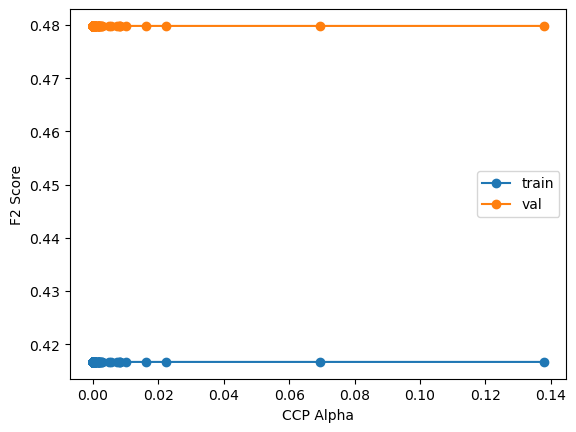

In [ ]:
plt.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
plt.plot(ccp_alphas, val_scores, marker='o', label='val', drawstyle='steps-post')
plt.xlabel('CCP Alpha')
plt.ylabel('F2 Score')
plt.legend()
plt.show()

In [ ]:
#Show the best ccp_alpha
best_ccp_alpha = ccp_alphas[np.argmax(val_scores)]
print('Best CCP Alpha:', best_ccp_alpha)

Best CCP Alpha: 0.0


In [ ]:
#apply the best ccp_alpha
dt_clf = tree.DecisionTreeClassifier(ccp_alpha=best_ccp_alpha, class_weight='balanced')
dt_clf.fit(train_x, train_y)

train_acc, val_acc = get_f2_scores(dt_clf, train_x, train_y, val_x, val_y)
print('Train F2:', train_acc)
print('Validation F2:', val_acc)

print(classification_report(val_y, dt_clf.predict(val_x)))

Train F2: 0.9999700951810551
Validation F2: 0.7852080063915372
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     33543
           1       0.62      0.66      0.64      7046

    accuracy                           0.87     40589
   macro avg       0.77      0.79      0.78     40589
weighted avg       0.87      0.87      0.87     40589



accuracy is quite high however the recall of 0 is larger than 1's (without handling data skewness)
Accuracy is high, however precision and recall for class 1 are much lower, and with class 0's precision and recall reaching >=0.9. Suggesting overfitting for class 0

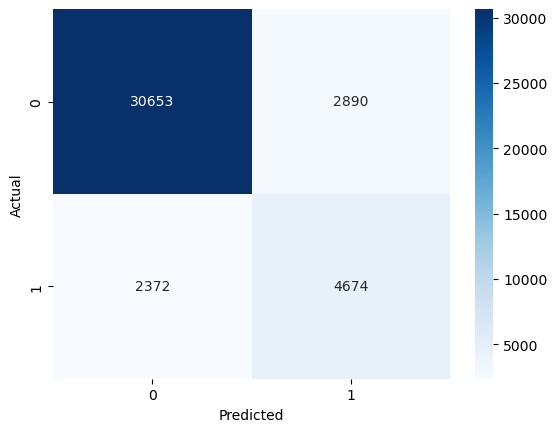

In [ ]:
#Show the confusion matrix
conf_matrix = confusion_matrix(val_y, dt_clf.predict(val_x))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

RANDOM FOREST

In [331]:
train_x = train_data_X
train_y = train_data_y

test_x = test_data_X
test_y = test_data_y

val_x = val_data_X
val_y = val_data_y

print(train_x.shape)
print(train_y.shape)


(121766, 53)
(121766,)


In [332]:
# SMOTE oversampling the minority class
smote = SMOTE(sampling_strategy=0.25)
train_x, train_y = smote.fit_resample(train_x, train_y)
print(train_x.shape)
print(train_y.shape)

(125592, 53)
(125592,)


In [333]:
#Under sampling the majority class
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_train, y_train = rus.fit_resample(x_train, y_train)


In [334]:
print(x_train.shape)
print(y_train.shape)

(200948, 53)
(200948,)


In [335]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
pipeline_rf = Pipeline(steps=[('prep', col_transform), ('model', rf_clf)])
pipeline_rf.fit(train_x, train_y)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('impute',
                                                  CustomMeanImputer(ranges={'BMI': (10,
                                                                                    50),
                                                                            'ExtraAlcoholTest': (-100,
                                                                                                 100),
                                                                            'ExtraMedTest': (-100,
                                                                                             100)}),
                                                  [4, 5, 0]),
                                                 ('num', PowerTransformer(),
                                                  Index(['BMI', 'MentHlth', 'PhysHlth', 'Age', 'ExtraMedTest',
       'ExtraAlcoholTest'],
      dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  Index(['BMI', 'MentHlth', 'PhysHlth', 'Age', 'ExtraMedTest',
       'ExtraAlcoholTest'],
      dtype='object'))])),
                ('model', RandomForestClassifier(class_weight='balanced'))])

In [338]:
train_acc, val_acc = get_f2_scores(pipeline_rf, train_x, train_y, val_x, val_y)
print("Train F2 Score: {:.3f}".format(train_acc))
print("Validation F2 Score: {:.3f}".format(val_acc))

print(classification_report(val_y, pipeline_rf.predict(val_x)))

Train F2 Score: 1.000
Validation F2 Score: 0.903
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     33345
           1       0.94      0.80      0.86      7244

    accuracy                           0.96     40589
   macro avg       0.95      0.89      0.92     40589
weighted avg       0.95      0.96      0.95     40589



Pretty overfitting, with very high recall rate for 0 however the acuracy and precision is high too

In [339]:
#tune the hyperparameters using grid search cv for the random forest
parameters = {'model__n_estimators':np.arange(50, 400, 50),
              'model__max_depth':np.arange(2, 40, 2)}

f2_scorer = make_scorer(fbeta_score, beta=2, average='macro')

rf_clf = RandomForestClassifier(class_weight='balanced')
grid_search_rf = GridSearchCV(pipeline_rf, parameters, scoring=f2_scorer, cv=5)
grid_search_rf.fit(train_x, train_y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('impute',
                                                                         CustomMeanImputer(ranges={'BMI': (10,
                                                                                                           50),
                                                                                                   'ExtraAlcoholTest': (-100,
                                                                                                                        100),
                                                                                                   'ExtraMedTest': (-100,
                                                                                                                    100)}),
                                                                         [4, 5,
                                                                          0]),
                                                                        ('num',
                                                                         PowerTransformer(),
                                                                         Index(['BMI', 'MentHlth', 'PhysHlth', 'Age', 'ExtraMedTest',
       'ExtraAlcoholTest'],
      dtype='object')),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         Ind...e', 'ExtraMedTest',
       'ExtraAlcoholTest'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestClassifier(class_weight='balanced'))]),
             param_grid={'model__max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38]),
                         'model__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350])},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2, average=macro))

In [340]:
print(grid_search_rf.best_score_)
print(grid_search_rf.best_params_)

0.9132909002667666
{'model__max_depth': 16, 'model__n_estimators': 200}


In [341]:
rf_clf = grid_search_rf.best_estimator_

train_acc, val_acc = get_f2_scores(rf_clf, train_x, train_y, val_x, val_y)

print("Train F2 Score: {:.3f}".format(train_acc))
print("Validation F2 Score: {:.3f}".format(val_acc))

print(classification_report(val_y, rf_clf.predict(val_x)))



Train F2 Score: 0.956
Validation F2 Score: 0.912
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     33345
           1       0.84      0.86      0.85      7244

    accuracy                           0.95     40589
   macro avg       0.91      0.91      0.91     40589
weighted avg       0.95      0.95      0.95     40589



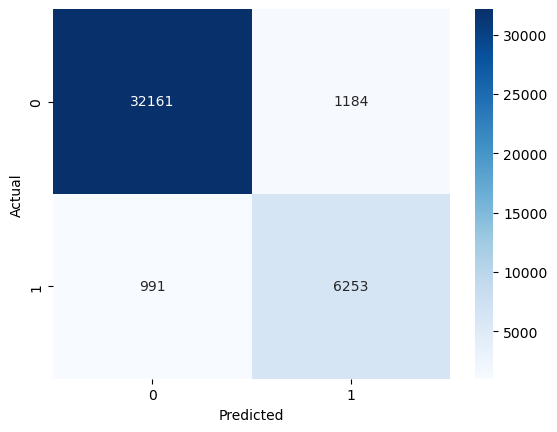

In [343]:
#Show the confusion matrix
conf_matrix = confusion_matrix(val_y, rf_clf.predict(val_x))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression:
- Train F2: 0.795
- Validation F2: 0.602


Decision tree:
- Train F2: 0.8395912144689195
- Validation F2: 0.819257504305122

Random Forest:
- without handle the skewness
- - Train F2 score: 0.873
- - Validation F2 score: 0.825

- with handling the skewness
- -  Train F2 score: 0.965
- -  Validation F2 score: 0.831

there's a huge different in the scores between logReg vs decision tree and random forest. The recall score is much lower along with lower accuracy

For the decision tree, took a lot of resources during the post-pruning process but produced a resource less than random forest. This was without playing with the threshold to ensure that there's the smallest number of false negative as posible.

-> Selecting random forest for further configuration and the final model for the dataset.

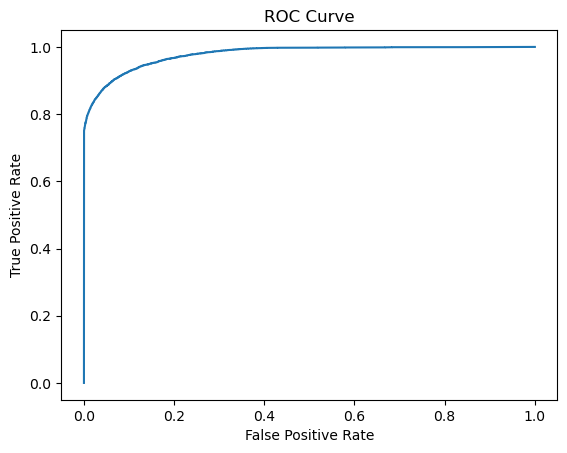

In [344]:
#Plot the ROC curve for the random forest 
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(val_y, rf_clf.predict_proba(val_x)[:,1])

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()




In [345]:
#best threshold for the least false negative rate
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('Optimal Threshold:', 0.36457925214368536)


Optimal Threshold: 0.36457925214368536


In [365]:
#apply the optimal threshold
val_pred = (rf_clf.predict_proba(val_x)[:,1] >= optimal_threshold).astype(int)

train_acc, val_acc = get_f2_scores(rf_clf, train_x, train_y, val_x, val_y)

print("Train F2 Score: {:.3f}".format(train_acc))
print("Validation F2 Score: {:.3f}".format(val_acc))

print(classification_report(val_y, val_pred))



Train F2 Score: 0.956
Validation F2 Score: 0.912
              precision    recall  f1-score   support

           0       0.98      0.93      0.96     33345
           1       0.75      0.90      0.82      7244

    accuracy                           0.93     40589
   macro avg       0.86      0.92      0.89     40589
weighted avg       0.94      0.93      0.93     40589



Moving the threshold so that it will catch the most 1 class without dropping much precision, 75% in precision and having over 0.9 recall in class 1 is good enough

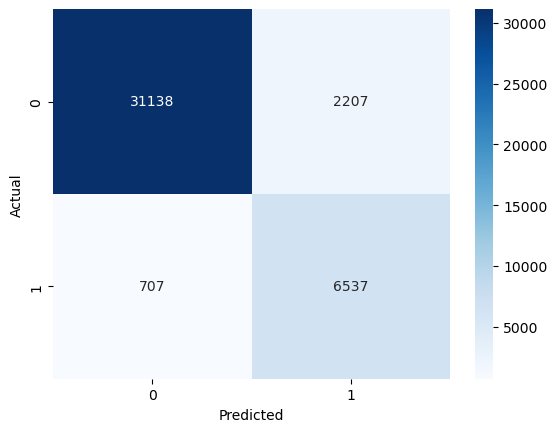

In [366]:
#Show the confusion matrix
conf_matrix = confusion_matrix(val_y, val_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [371]:
data_test = pd.read_csv('data_test.csv')   

In [372]:
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50736 entries, 0 to 50735
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    50736 non-null  int64  
 1   HighBP                50736 non-null  int64  
 2   HighChol              50736 non-null  int64  
 3   CholCheck             50736 non-null  int64  
 4   BMI                   50736 non-null  int64  
 5   Smoker                50736 non-null  int64  
 6   Stroke                50736 non-null  int64  
 7   HeartDiseaseorAttack  50736 non-null  int64  
 8   PhysActivity          50736 non-null  int64  
 9   Fruits                50736 non-null  int64  
 10  Veggies               50736 non-null  int64  
 11  HvyAlcoholConsump     50736 non-null  int64  
 12  AnyHealthcare         50736 non-null  int64  
 13  NoDocbcCost           50736 non-null  int64  
 14  GenHlth               50736 non-null  int64  
 15  MentHlth           

In [373]:
#Apply the optimal threshold to the test set
test_pred = (rf_clf.predict_proba(data_test)[:,1] >= optimal_threshold).astype(int)


In [374]:
#Save the predictions to a csv file
submission = pd.DataFrame({'Id': data_test['Id'], 'Status': test_pred})

In [375]:
submission.to_csv('s3928848_predictions.csv', index=False)

In [376]:
#Count number of 1 and 0 in the predictions
submission['Status'].value_counts()


Status
0    41380
1     9356
Name: count, dtype: int64